In [118]:
import pandas as pd

In [119]:
df = pd.read_csv('insurance.csv', delimiter=';')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   region    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 52.4+ KB


In [121]:
df.head()

,age,bmi,children,region,charges
0,19,27.900,0,southwest,16884.92400
1,18,33.770,1,southeast,1725.55230
2,28,33.000,3,southeast,4449.46200
3,33,22.705,0,northwest,21984.47061
4,32,28.880,0,northwest,3866.85520


In [122]:
df.isna().sum()

age         0
bmi         0
children    0
region      0
charges     0
dtype: int64

In [123]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

age         0.0
bmi         0.0
children    0.0
region      0.0
charges     0.0
dtype: float64

In [124]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [125]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [126]:
dummies = pd.get_dummies(df['region'], prefix="region", drop_first=True)

In [127]:
dummies = dummies.astype(int)

In [128]:
df = pd.concat([df, dummies], axis=1)

In [129]:
df.drop(columns=['region'], inplace=True)

In [130]:
df.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,1
1,18,33.770,1,1725.55230,0,1,0
2,28,33.000,3,4449.46200,0,1,0
3,33,22.705,0,21984.47061,1,0,0
4,32,28.880,0,3866.85520,1,0,0


In [131]:
X = df.drop(columns=['charges'])
y = df['charges']

In [132]:
import statsmodels.api as sm

In [133]:
X = sm.add_constant(X)

In [134]:
X.head()

,const,age,bmi,children,region_northwest,region_southeast,region_southwest
0,1.0,19,27.900,0,0,0,1
1,1.0,18,33.770,1,0,1,0
2,1.0,28,33.000,3,0,1,0
3,1.0,33,22.705,0,1,0,0
4,1.0,32,28.880,0,1,0,0


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
f'X train length: {len(X_train)}, X test length: {len(X_test)}, y train length: {len(y_train)}, y test length: {len(y_test)}'

'X train length: 1070, X test length: 268, y train length: 1070, y test length: 268'

In [138]:
X_train.head()

,const,age,bmi,children,region_northwest,region_southeast,region_southwest
560,1.0,46,19.95,2,1,0,0
1285,1.0,47,24.32,0,0,0,0
1142,1.0,52,24.86,0,0,1,0
969,1.0,39,34.32,5,0,1,0
486,1.0,54,21.47,3,1,0,0


In [139]:
X_test.head()

,const,age,bmi,children,region_northwest,region_southeast,region_southwest
764,1.0,45,25.175,2,0,0,0
887,1.0,36,30.020,0,1,0,0
890,1.0,64,26.885,0,1,0,0
1293,1.0,46,25.745,3,1,0,0
259,1.0,19,31.920,0,1,0,0


In [140]:
for index in range(0, len(X_train.columns)):
  regressor = sm.OLS(y_train, X_train).fit()
  max_p_value = regressor.pvalues.max()
  significance = 0.05

  if max_p_value > significance:
    column_name = regressor.pvalues.idxmax()
    X_train.drop(columns=[column_name], inplace=True)
    X_test.drop(columns=[column_name], inplace=True)

In [141]:
X_train.head()

,const,age,bmi,children
560,1.0,46,19.95,2
1285,1.0,47,24.32,0
1142,1.0,52,24.86,0
969,1.0,39,34.32,5
486,1.0,54,21.47,3


In [142]:
X_test.head()

,const,age,bmi,children
764,1.0,45,25.175,2
887,1.0,36,30.020,0
890,1.0,64,26.885,0
1293,1.0,46,25.745,3
259,1.0,19,31.920,0


In [143]:
regressor = sm.OLS(y_train, X_train).fit()

In [144]:
y_pred = regressor.predict(X_test)

In [145]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

module = abs(df_pred['Actual'] - df_pred['Predicted'])
df_pred['Module'] = module

In [146]:
df_pred.head()

,Actual,Predicted,Module
764,9095.06825,13305.289459,4210.221209
887,5272.17580,11801.951701,6529.775901
890,29330.98315,16941.714371,12389.268779
1293,9301.89355,14278.422069,4976.528519
259,33750.29180,8680.254394,25070.037406


In [147]:
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [149]:
f'Mean Squared Error: {mse}, R^2 Score: {r2}'

'Mean Squared Error: 131201335.64669806, R^2 Score: 0.15489592484270753'

In [150]:
import matplotlib.pyplot as plt

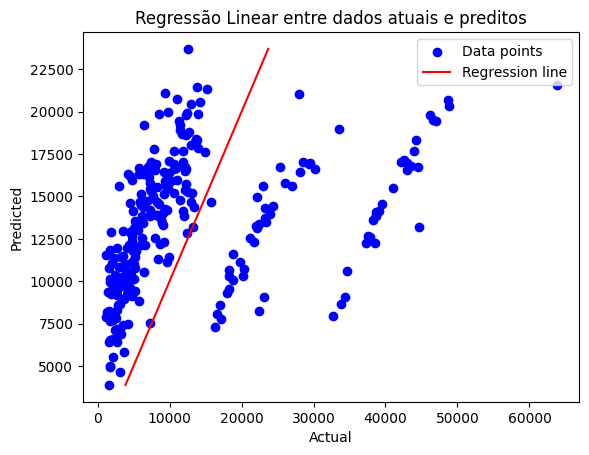

In [151]:
plt.scatter(df_pred['Actual'], df_pred['Predicted'], color='blue', label='Data points')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', label='Regression line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regressão Linear entre dados atuais e preditos')
plt.legend()
plt.show()